In [2]:
import glob, pylab, pandas as pd
import pydicom, numpy as np

from os import listdir
from os.path import isfile, join

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score

import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

import plotly
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
from tqdm import tqdm
from PIL import Image
import cufflinks
import cv2 as cv

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')

Using TensorFlow backend.


In [3]:
# Images Example
train_images_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train'
train_images = [f for f in listdir(train_images_dir) if isfile(join(train_images_dir, f))]

test_images_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test'
test_images = [f for f in listdir(test_images_dir) if isfile(join(test_images_dir, f))]

print('5 Training images', train_images[:5]) # Print the first 5

5 Training images ['ISIC_0015719.jpg', 'ISIC_0052212.jpg', 'ISIC_0068279.jpg', 'ISIC_0074268.jpg', 'ISIC_0074311.jpg']


In [4]:
train = pd.read_csv(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train.csv')
test = pd.read_csv(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test.csv')

In [5]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000


In [6]:
train.drop(columns=['tfrecord', 'width', 'height'], inplace=True)
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [11]:
# fig=plt.figure(figsize=(15, 10))
# columns = 5; rows = 4
# for i in range(1, columns*rows +1):
#     ds = pydicom.dcmread(train_images_dir + train_images[i])
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(-ds.pixel_array, cmap=plt.cm.bone)
#     fig.add_subplot

In [ ]:
# fig=plt.figure(figsize=(15, 10))
# columns = 5; rows = 4
# a = train_images_dir + '\\' + train_images[2]
# ds = pydicom.dcmread(a, force=True)
# fig.add_subplot(rows, columns, 2)
# plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
# fig.add_subplot

Examples WITH Melanoma



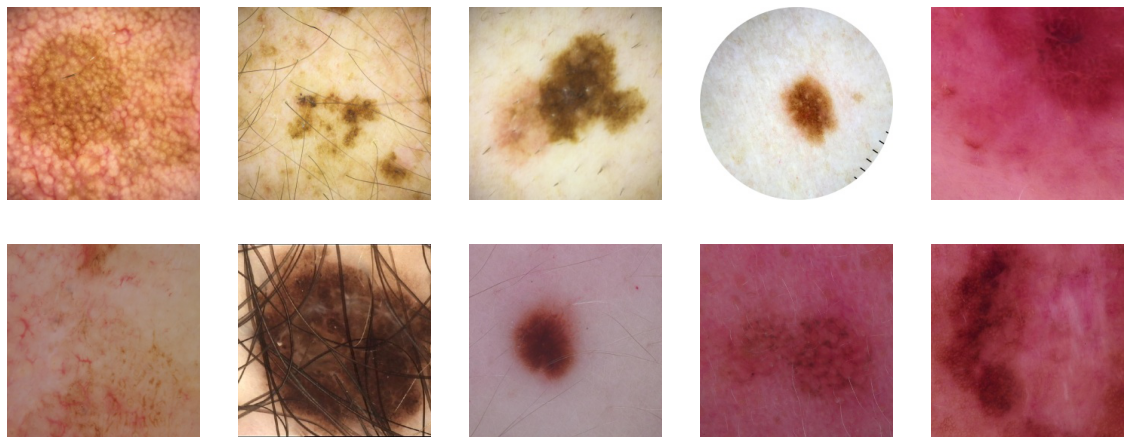


Examples WITHOUT Melanoma


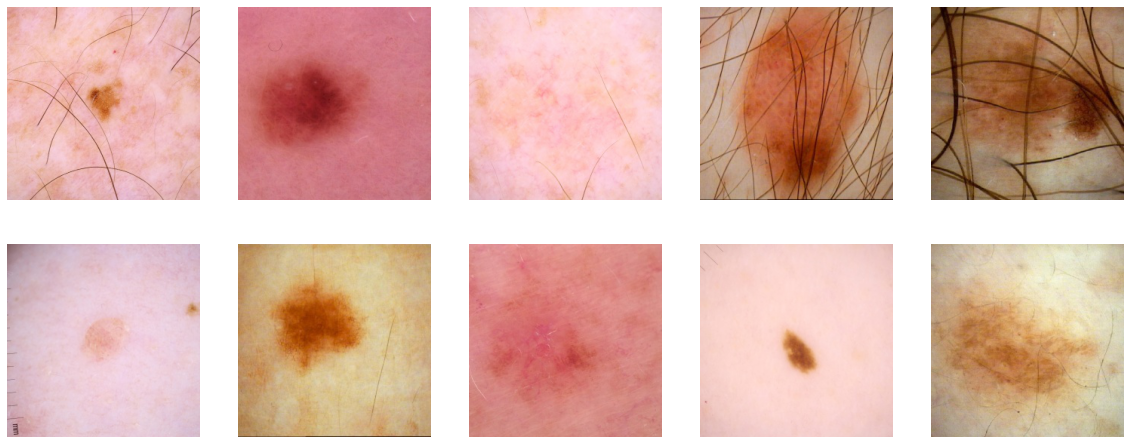

In [8]:
import cv2, pandas as pd, matplotlib.pyplot as plt

train = pd.read_csv(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train.csv')
print('Examples WITH Melanoma')
print('')
imgs = train.loc[train.target==1].sample(10).image_name.values
plt.figure(figsize=(20,8))

for i,k in enumerate(imgs):
    img = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\%s.jpg'%k)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(2,5,i+1); plt.axis('off')
    plt.imshow(img)
plt.show()

print('')
print('Examples WITHOUT Melanoma')
imgs = train.loc[train.target==0].sample(10).image_name.values
plt.figure(figsize=(20,8))
for i,k in enumerate(imgs):
    img = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\%s.jpg'%k)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(2,5,i+1); plt.axis('off')
    plt.imshow(img)
plt.show()

In [9]:
# Missing values
train.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
dtype: int64

In [10]:
train['age_approx2'] = train['age_approx'].fillna(0).astype('str')